# Core.Today
- AI Math Academy

https://core.today

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import random # random 라이브러리를 불러오자

In [ ]:
doors = ["A", "B", "C"] # 문을 세 개 만들자
prize = random.choice(doors) # 문 세 개 중에 하나를 랜덤하게 선택하자
# 실험자는 차가 어디 있는지 몰라야 함 (print 하지 말 것)

In [ ]:
# 실험자가 문을 선택하자
choice = doors[0] # 여기서는 첫 번째 문을 선택해 봤다.

In [ ]:
def MC(mychoice, prize):
    """
    진행자 함수.
    내가 선택한 답과 정답인 문을 MC에게 알려주면,
    내가 선택한 답과 정답이 아닌 문을 하나 알려준다.
    """
    candidates = ["A", "B", "C"] # 후보 리스트를 하나 만들자

    if mychoice == prize: # 만약 내 선택과 정답이 같으면
        candidates.remove(prize) # 후보 리스트에서 정답을 지우자
    else: # 내 선택이 정답과 같지 않으면
        candidates.remove(prize) # 후보 리스트에서 정답을 지우고
        candidates.remove(mychoice) # 후보 리스트에서 내 답을 지우자

    return random.choice(candidates) # 이제 남아 있는 후보 중에 랜덤하게 선택해서 return 하자.


In [ ]:
# MC에게 내 선택과 정답을 알려주면,
# 내가 선택하지 않은 문 중에서 정답이 아닌 문을 하나 보여준다.
MC(choice, prize)


'C'

In [ ]:
# 그럼 이제 당신은 선택을 바꿀 것인가?
print(choice, prize)


A A


# 내 답을 유지하는 실험

In [ ]:
for i in range(10):
    doors = ["A", "B", "C"]

    print(":: 실험", i)

    # 먼저 차가 있는 곳을 결정짓고
    prize = random.choice(doors)

    # 문을 하나 선택하자
    # 여기서는 첫 번째 문을 선택했다.
    mychoice = doors[0]

    # 진행자가 문을 하나 열어 보여주자
    opened_door = MC(mychoice, prize)

    # 내 답을 유지해 보자
    # 그럼 아무 것도 안하면 된다
    if mychoice == prize:
        print("당첨!")
    else:
        print("실패..")

:: 실험 0
실패..
:: 실험 1
실패..
:: 실험 2
실패..
:: 실험 3
당첨!
:: 실험 4
당첨!
:: 실험 5
실패..
:: 실험 6
실패..
:: 실험 7
실패..
:: 실험 8
실패..
:: 실험 9
실패..


# 내 답을 바꾸는 실험

In [ ]:
for i in range(10):
    doors = ["A", "B", "C"]

    print(":: 실험", i)

    # 먼저 차가 있는 곳을 결정짓고
    prize = random.choice(doors)

    # 문을 하나 선택하자
    # 여기서는 첫 번째 문을 선택했다.
    mychoice = doors[0]

    # 진행자가 문을 하나 열어 보여주자
    opened_door = MC(mychoice, prize)

    # 내 답을 바꾸자!
    doors.remove(mychoice) # doors에서 내 최초 선택을 제거
    doors.remove(opened_door) # doors에서 진행자가 보여준 문 제거

    mychoice = doors[0] # doors에 남은 선택은 오직 하나이므로 [0]번째 선택


    # 정답 체크해 보자
    if mychoice == prize:
        print("당첨!")
    else:
        print("실패..")

:: 실험 0
실패..
:: 실험 1
실패..
:: 실험 2
실패..
:: 실험 3
당첨!
:: 실험 4
실패..
:: 실험 5
실패..
:: 실험 6
당첨!
:: 실험 7
실패..
:: 실험 8
당첨!
:: 실험 9
실패..


# 함수로 만들기

- 선택을 바꾸지 않는 경우의 함수

In [ ]:
def no_change():
    doors = ["A", "B", "C"]

    # 먼저 차가 있는 곳을 결정짓고
    prize = random.choice(doors)

    # 문을 하나 선택하자
    # 여기서는 첫 번째 문을 선택했다.
    mychoice = doors[0]

    # 진행자가 문을 하나 열어 보여주자
    opened_door = MC(mychoice, prize)

    # 내 답을 유지해 보자
    # 그럼 아무 것도 안하면 된다
    if mychoice == prize:
        return 1 # 내 선택이 정답이면 1을 반환
    else:
        return 0 # 내 선택이 틀리면 0을 반환

In [ ]:
# 실험을 100번 해서 몇 번 맞았는지 테스트를 해보자

value = 0
for _ in range(100):
    value += no_change() # 내 선택이 정답이면 1을 더하고, 내 선택이 틀리면 0을 더한다.

print(value, '/ 100')

39 / 100


In [ ]:
# 100번 시행하는 실험을 100번 실행해 보자.

result = [] # 최종 결과값을 넣을 리스트를 만들자
for _ in range(100):
    value = 0
    for _ in range(100):
        value += no_change() # 내 선택이 정답이면 1을 더하고, 내 선택이 틀리면 0을 더한다.
    result.append(value) # 실험 결과값을 result에 넣어주자.

In [ ]:
result[:10]

[34, 32, 39, 31, 39, 43, 36, 46, 34, 31]

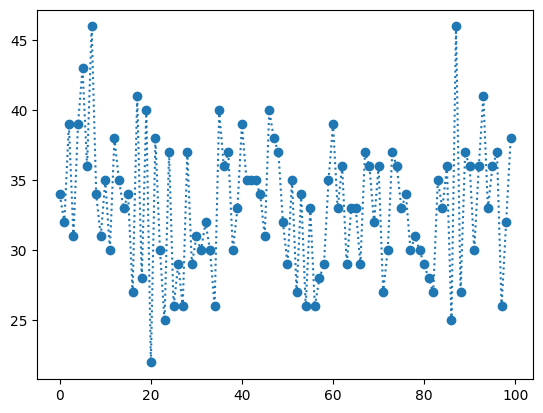

In [ ]:
plt.plot(result, 'o:')

# 함수로 만들기

- 선택을 바꾸는 경우의 함수

In [ ]:
def change():
    doors = ["A", "B", "C"]

    # 먼저 차가 있는 곳을 결정짓고
    prize = random.choice(doors)

    # 문을 하나 선택하자
    # 여기서는 첫 번째 문을 선택했다.
    mychoice = doors[0]

    # 진행자가 문을 하나 열어 보여주자
    opened_door = MC(mychoice, prize)

    # 내 답을 바꾸자!
    doors.remove(mychoice) # doors에서 내 최초 선택을 제거
    doors.remove(opened_door) # doors에서 진행자가 보여준 문 제거

    mychoice = doors[0] # doors에 남은 선택은 오직 하나이므로 [0]번째 선택

    if mychoice == prize:
        return 1 # 내 선택이 정답이면 1을 반환
    else:
        return 0 # 내 선택이 틀리면 0을 반환


In [ ]:
# 실험을 100번 해서 몇 번 맞았는지 테스트를 해보자

value = 0
for _ in range(100):
    value += change() # 내 선택이 정답이면 1을 더하고, 내 선택이 틀리면 0을 더한다.

print(value, '/ 100')

64 / 100


In [ ]:
# 100번 시행하는 실험을 100번 실행해 보자.

result = [] # 최종 결과값을 넣을 리스트를 만들자
for _ in range(100):
    value = 0
    for _ in range(100):
        value += change() # 내 선택이 정답이면 1을 더하고, 내 선택이 틀리면 0을 더한다.
    result.append(value) # 실험 결과값을 result에 넣어주자.


In [ ]:
result[:10]

[69, 71, 61, 76, 60, 61, 65, 64, 73, 62]

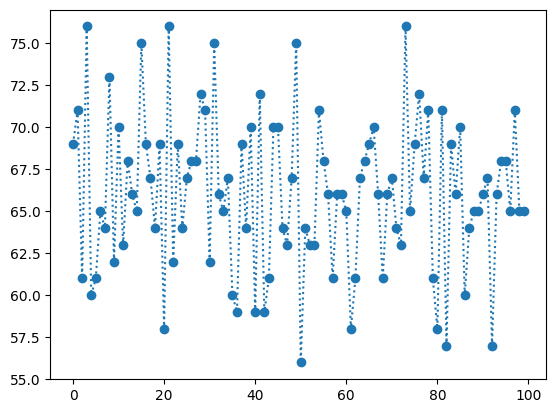

In [ ]:
plt.plot(result, 'o:')

In [ ]:
result_change = []
result_nochange = []

# 선택을 바꿀 때의 실험 결과
for _ in range(100):
    value = 0
    for _ in range(100):
        value += change()
    result_change.append(value)

# 선택을 유지할 때의 실험 결과
for _ in range(100):
    value = 0
    for _ in range(100):
        value += no_change()
    result_nochange.append(value)


Text(0, 0.5, '? / 100')

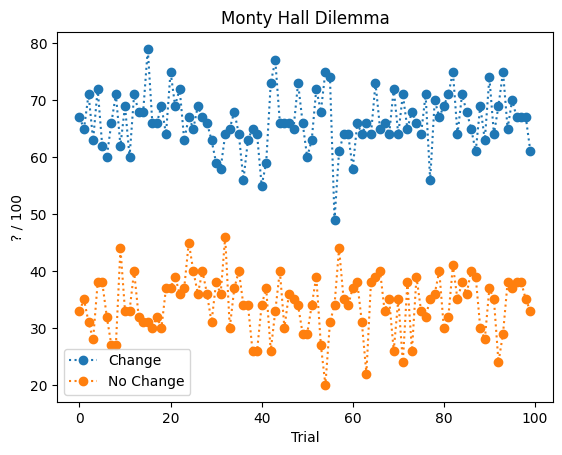

In [ ]:
plt.plot(result_change, 'o:', label='Change')
plt.plot(result_nochange, 'o:', label='No Change')
plt.legend()
plt.title('Monty Hall Dilemma')
plt.xlabel('Trial')
plt.ylabel('? / 100')

# 많이 돌려보자

In [ ]:
number_trial = 10000

result_change = []
result_nochange = []

# 선택을 바꿀 때의 실험 결과
for _ in range(number_trial):
    value = 0
    for _ in range(100):
        value += change()
    result_change.append(value)

# 선택을 유지할 때의 실험 결과
for _ in range(number_trial):
    value = 0
    for _ in range(100):
        value += no_change()
    result_nochange.append(value)

Text(0, 0.5, '? / 100')

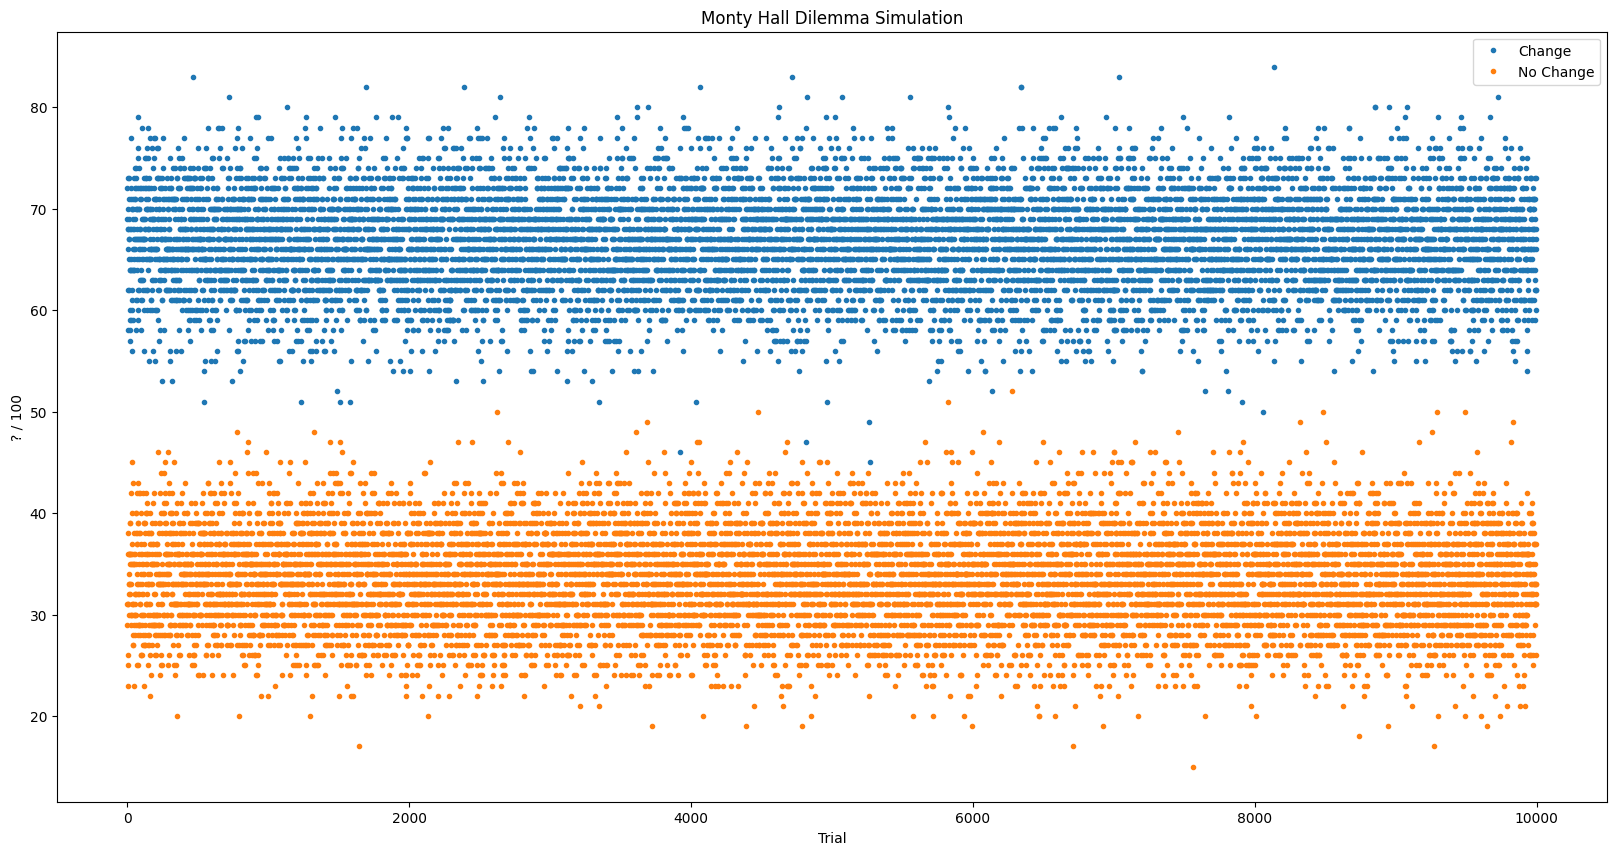

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(result_change, '.', label='Change')
plt.plot(result_nochange, '.', label='No Change')
plt.legend()
plt.title('Monty Hall Dilemma Simulation')
plt.xlabel('Trial')
plt.ylabel('? / 100')


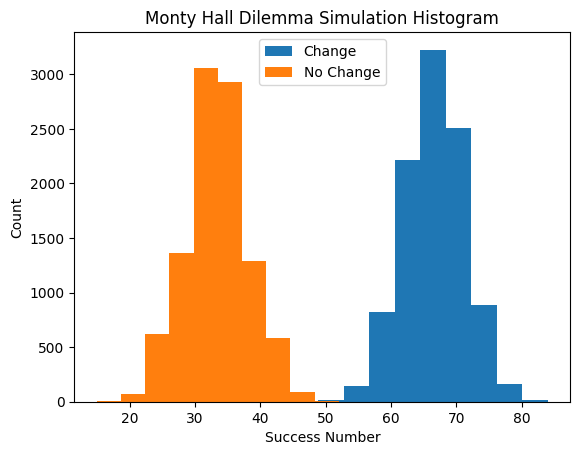

In [ ]:
plt.hist(result_change, label='Change');
plt.hist(result_nochange, label='No Change');
plt.legend()
plt.title('Monty Hall Dilemma Simulation Histogram');
plt.xlabel('Success Number');
plt.ylabel('Count');


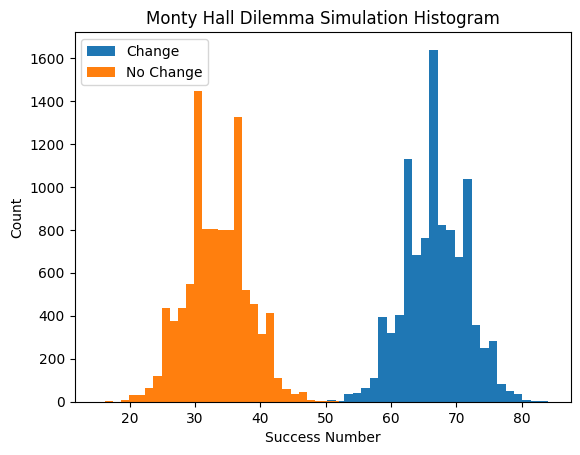

In [ ]:
plt.hist(result_change, label='Change', bins=30);
plt.hist(result_nochange, label='No Change', bins=30);
plt.legend()
plt.title('Monty Hall Dilemma Simulation Histogram');
plt.xlabel('Success Number');
plt.ylabel('Count');

# 진짜 많이 돌려보자

In [ ]:
from tqdm import tqdm

In [ ]:
tic = time.time() # 시간 측정 시작

number_trial = 1000000

result_change = []
result_nochange = []

# 선택을 바꿀 때의 실험 결과
for _ in tqdm(range(number_trial)):
    value = 0
    for _ in range(100):
        value += change()
    result_change.append(value)

# 선택을 유지할 때의 실험 결과
for _ in range(number_trial):
    value = 0
    for _ in range(100):
        value += no_change()
    result_nochange.append(value)

toc = time.time() # 시간 측정 끝
print("총 걸린 시간 : ", toc - tic)

100%|██████████| 1000000/1000000 [03:54<00:00, 4266.66it/s]


총 걸린 시간 :  425.07958722114563


Text(0, 0.5, '? / 100')

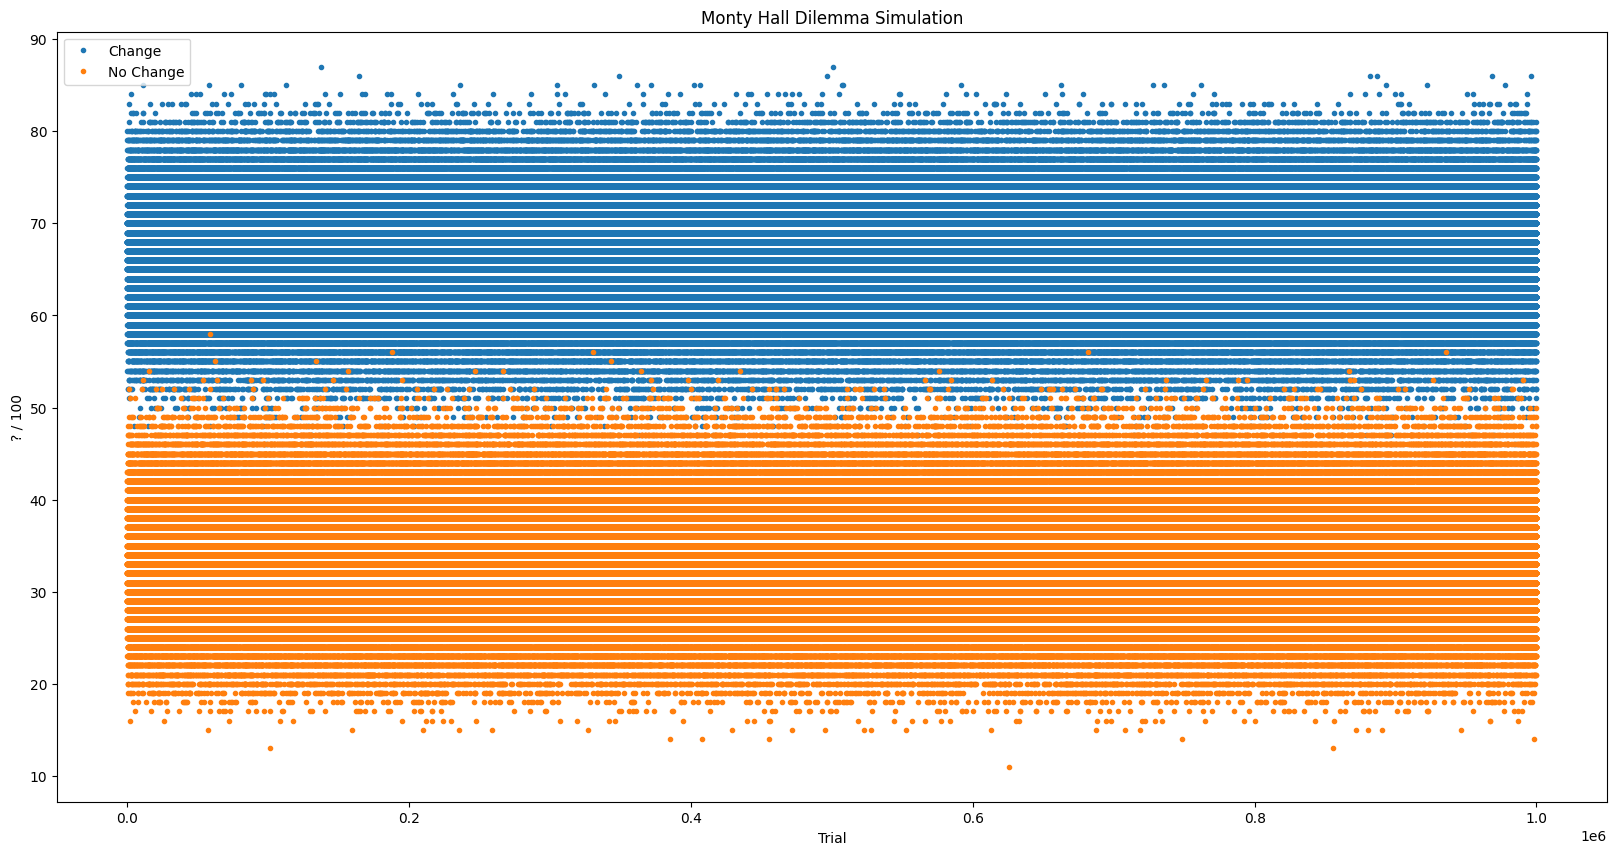

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(result_change, '.', label='Change')
plt.plot(result_nochange, '.', label='No Change')
plt.legend()
plt.title('Monty Hall Dilemma Simulation')
plt.xlabel('Trial')
plt.ylabel('? / 100')

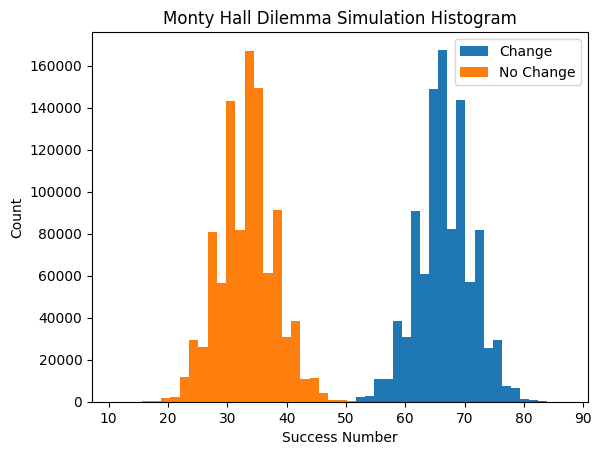

In [ ]:
plt.hist(result_change, label='Change', bins=30);
plt.hist(result_nochange, label='No Change', bins=30);
plt.legend()
plt.title('Monty Hall Dilemma Simulation Histogram');
plt.xlabel('Success Number');
plt.ylabel('Count');

In [ ]:
print("선택 바꿨을 때 평균", np.mean(result_change))
print("선택 유지했을 때 평균", np.mean(result_nochange))

선택 바꿨을 때 평균 66.674786
선택 유지했을 때 평균 33.338817


In [ ]:
def monty_hall_simulation(num_doors, num_trials):
    win_if_switch = 0
    win_if_stay = 0

    for _ in range(num_trials):
        # 자동차가 있는 문을 랜덤하게 선택
        car_position = random.randint(0, num_doors - 1)

        # 참가자가 선택한 문을 랜덤하게 선택
        first_choice = random.randint(0, num_doors - 1)

        # 사회자는 참가자가 선택한 문을 제외하고, 나머지 문 중에서 염소가 있는 문을 연다.
        if car_position == first_choice:
            # 참가자가 자동차가 있는 문을 처음에 선택한 경우
            # 사회자는 남은 문 중 아무 문이나 고를 수 있다.
            remaining_doors = list(range(num_doors))
            remaining_doors.remove(first_choice)
            opened_doors = random.sample(remaining_doors, num_doors - 2)
        else:
            # 참가자가 자동차가 있는 문이 아닌 문을 선택한 경우
            # 사회자는 참가자가 선택하지 않은 염소가 있는 문을 연다.
            remaining_doors = list(range(num_doors))
            remaining_doors.remove(first_choice)
            remaining_doors.remove(car_position)
            opened_doors = random.sample(remaining_doors, num_doors - 2)

        # 남은 문 중 하나를 선택
        unopened_door = set(range(num_doors)) - set(opened_doors) - {first_choice}
        remaining_door = unopened_door.pop()

        # 참가자가 선택을 바꿀 경우 승리 여부
        if remaining_door == car_position:
            win_if_switch += 1

        # 참가자가 선택을 유지할 경우 승리 여부
        if first_choice == car_position:
            win_if_stay += 1

    switch_win_rate = win_if_switch / num_trials * 100
    stay_win_rate = win_if_stay / num_trials * 100

    return switch_win_rate, stay_win_rate

In [ ]:
# 시뮬레이션 실행
num_doors = 10
num_trials = 10000

switch_win_rate, stay_win_rate = monty_hall_simulation(num_doors, num_trials)
print(f"Switching win rate: {switch_win_rate:.2f}%")
print(f"Staying win rate: {stay_win_rate:.2f}%")

Switching win rate: 89.74%
Staying win rate: 10.26%
